In [1]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

fedfunds_data = pf.get_series(series_id="FEDFUNDS", api_key=api_key)
lower = pf.get_series(series_id="DFEDTARL", api_key=api_key)
upper = pf.get_series(series_id="DFEDTARU", api_key=api_key) 

print(fedfunds_data)
print(lower)
print(upper)

fedfunds_info = pf.get_series_info(series_id="FEDFUNDS", api_key=api_key)

    realtime_start realtime_end       date  value
0       2023-05-13   2023-05-13 1954-07-01   0.80
1       2023-05-13   2023-05-13 1954-08-01   1.22
2       2023-05-13   2023-05-13 1954-09-01   1.07
3       2023-05-13   2023-05-13 1954-10-01   0.85
4       2023-05-13   2023-05-13 1954-11-01   0.83
..             ...          ...        ...    ...
821     2023-05-13   2023-05-13 2022-12-01   4.10
822     2023-05-13   2023-05-13 2023-01-01   4.33
823     2023-05-13   2023-05-13 2023-02-01   4.57
824     2023-05-13   2023-05-13 2023-03-01   4.65
825     2023-05-13   2023-05-13 2023-04-01   4.83

[826 rows x 4 columns]
     realtime_start realtime_end       date  value
0        2023-05-13   2023-05-13 2008-12-16    0.0
1        2023-05-13   2023-05-13 2008-12-17    0.0
2        2023-05-13   2023-05-13 2008-12-18    0.0
3        2023-05-13   2023-05-13 2008-12-19    0.0
4        2023-05-13   2023-05-13 2008-12-20    0.0
...             ...          ...        ...    ...
5257     2023-05-13

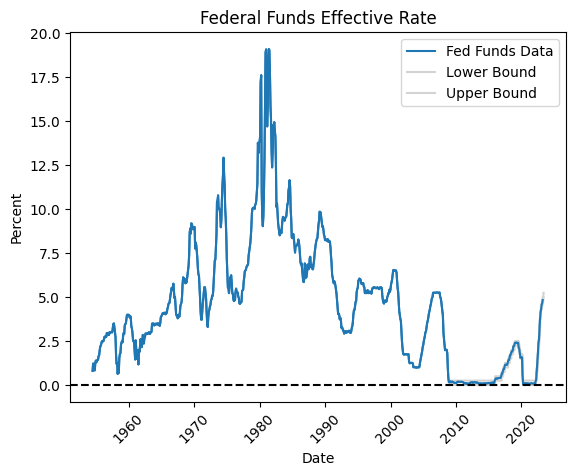

In [2]:
# Convert the "date" column to datetime format
fedfunds_data['date'] = pd.to_datetime(fedfunds_data['date'])
lower['date'] = pd.to_datetime(lower['date'])
upper['date'] = pd.to_datetime(upper['date'])

# Plotting the data
plt.plot(fedfunds_data['date'], fedfunds_data['value'], color='tab:blue', label='Fed Funds Data')
plt.plot(lower['date'], lower['value'], color='lightgrey', label='Lower Bound')
plt.plot(upper['date'], upper['value'], color='lightgrey', label='Upper Bound')

# Plot the graph
plt.plot(fedfunds_data['date'], fedfunds_data['value'])
plt.xlabel('Date')
plt.ylabel(fedfunds_info.units)
plt.legend()
plt.title(fedfunds_info.title)
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

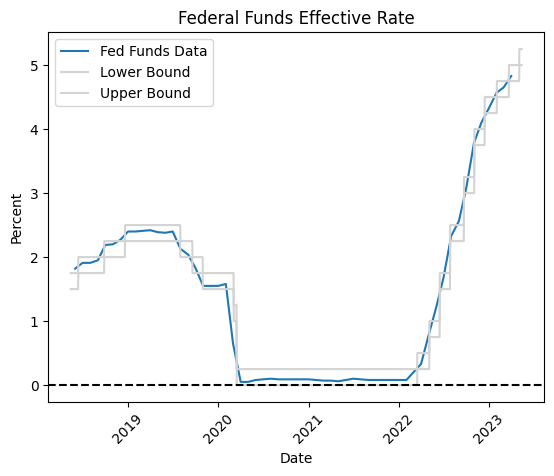

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the date column in each dataframe
fedfunds_data['date'] = pd.to_datetime(fedfunds_data['date'])
lower['date'] = pd.to_datetime(lower['date'])
upper['date'] = pd.to_datetime(upper['date'])

# Filter the data for the last 5 years
current_date = pd.Timestamp.today()
five_years_ago = current_date - pd.DateOffset(years=5)

fedfunds_data_last_5y = fedfunds_data[fedfunds_data['date'] >= five_years_ago]
lower_last_5y = lower[lower['date'] >= five_years_ago]
upper_last_5y = upper[upper['date'] >= five_years_ago]

# Plotting the data
plt.plot(fedfunds_data_last_5y['date'], fedfunds_data_last_5y['value'], color='tab:blue', label='Fed Funds Data')
plt.plot(lower_last_5y['date'], lower_last_5y['value'], color='lightgrey', label='Lower Bound')
plt.plot(upper_last_5y['date'], upper_last_5y['value'], color='lightgrey', label='Upper Bound')

plt.xlabel('Date')
plt.ylabel(fedfunds_info.units)
plt.legend()
plt.title(fedfunds_info.title)
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [4]:
# Convert DataFrame to JSON
fedfunds_json = fedfunds_data.to_json(orient='records')

# Parse the JSON
data = json.loads(fedfunds_json)

# Get the last item
last_item = data[-1]

print(str(fedfunds_info.title) + ": " + str(last_item['value']) + "% | Last Updated: " + str(fedfunds_info.last_updated))

Federal Funds Effective Rate: 4.83% | Last Updated: 2023-05-01 15:18:02-05


In [5]:
print("Info: " + str(fedfunds_info.id))
print("Title: " + str(fedfunds_info.title))
print("Frequency: " + str(fedfunds_info.frequency))
print("Units: " + str(fedfunds_info.units))
print("Last Updated: " + str(fedfunds_info.last_updated))
print("Popularity: " + str(fedfunds_info.popularity))
print("Notes: " + str(fedfunds_info.notes))

Info: FEDFUNDS
Title: Federal Funds Effective Rate
Frequency: Monthly
Units: Percent
Last Updated: 2023-05-01 15:18:02-05
Popularity: 99
Notes: Averages of daily figures. 

For additional historical federal funds rate data, please see  Daily Federal Funds Rate from 1928-1954 (https://fred.stlouisfed.org/categories/33951).

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effec